# Artificial Intelligence Nanodegree

## Convolutional Neural Networks

---

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

### 1. Load CIFAR-10 Database

In [1]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


### 2. Visualize the First 24 Training Images

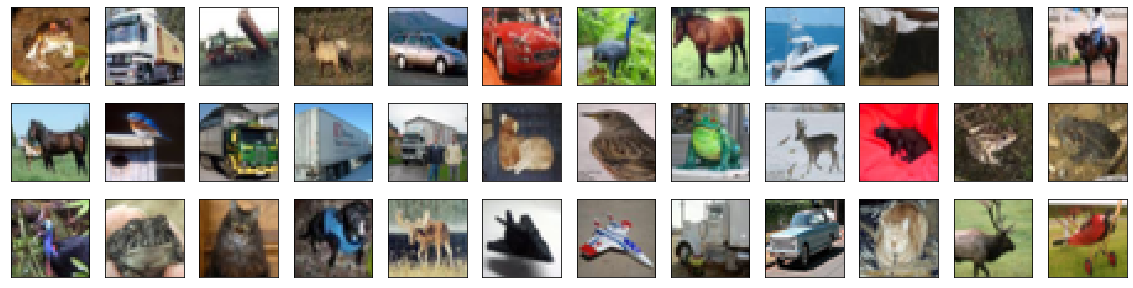

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

### 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [3]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Break Dataset into Training, Testing, and Validation Sets

In [4]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (45000, 32, 32, 3)
45000 train samples
10000 test samples
5000 validation samples


### 5. Define the Model Architecture 

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

### model_1 : フィルタサイズを変更
- before : 2x2
- after  : 3x3

In [6]:
model_1 = Sequential()
model_1.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_1.add(MaxPooling2D(pool_size=2))
model_1.add(Dropout(0.3))
model_1.add(Flatten())
model_1.add(Dense(500, activation='relu'))
model_1.add(Dropout(0.4))
model_1.add(Dense(10, activation='softmax'))

### model_2 : 
- 一つ目のMaxPoolingをConv2Dに変更
- 次元を削減しすぎないようにする

In [7]:
model_2 = Sequential()
model_2.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model_2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_2.add(MaxPooling2D(pool_size=2))
model_2.add(Dropout(0.3))
model_2.add(Flatten())
model_2.add(Dense(500, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

### model_3 : 
- Dropoutを増やして、過学習を防ぐ

In [8]:
model_3 = Sequential()
model_3.add(Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model_3.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_3.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=2))
model_3.add(Dropout(0.2))
model_3.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model_3.add(MaxPooling2D(pool_size=2))
model_3.add(Dropout(0.25))
model_3.add(Flatten())
model_3.add(Dense(500, activation='relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(10, activation='softmax'))

### 6. Compile the Model 

In [9]:
# compile the model
model_1.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_2.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
model_3.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### 7. Train the Model 

In [10]:
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

In [11]:
# train the model
checkpointer_1 = ModelCheckpoint(filepath='model_1.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

hist_1 = model_1.fit(x_train, y_train, batch_size=64, epochs=100,
                    validation_data=(x_valid, y_valid), callbacks=[EarlyStopping(), checkpointer_1], 
                    verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 7s - loss: 1.6441 - acc: 0.4031 - val_loss: 1.6583 - val_acc: 0.4274

Epoch 00001: val_loss improved from inf to 1.65826, saving model to model_1.weights.best.hdf5
Epoch 2/100
 - 5s - loss: 1.2647 - acc: 0.5500 - val_loss: 1.4162 - val_acc: 0.4902

Epoch 00002: val_loss improved from 1.65826 to 1.41617, saving model to model_1.weights.best.hdf5
Epoch 3/100
 - 5s - loss: 1.1160 - acc: 0.6043 - val_loss: 1.0883 - val_acc: 0.6142

Epoch 00003: val_loss improved from 1.41617 to 1.08825, saving model to model_1.weights.best.hdf5
Epoch 4/100
 - 5s - loss: 1.0238 - acc: 0.6407 - val_loss: 1.0018 - val_acc: 0.6512

Epoch 00004: val_loss improved from 1.08825 to 1.00178, saving model to model_1.weights.best.hdf5
Epoch 5/100
 - 5s - loss: 0.9605 - acc: 0.6649 - val_loss: 0.9099 - val_acc: 0.6790

Epoch 00005: val_loss improved from 1.00178 to 0.90988, saving model to model_1.weights.best.hdf5
Epoch 6/100
 - 5s - loss: 0.9153 - acc: 

In [15]:
checkpointer_2 = ModelCheckpoint(filepath='model_2.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

hist_2 = model_2.fit(x_train, y_train, batch_size=64, epochs=100,
                    validation_data=(x_valid, y_valid), callbacks=[EarlyStopping(), checkpointer_2], 
                    verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 8s - loss: 0.7541 - acc: 0.7403 - val_loss: 0.7686 - val_acc: 0.7374

Epoch 00001: val_loss improved from inf to 0.76864, saving model to model_2.weights.best.hdf5
Epoch 2/100
 - 8s - loss: 0.7007 - acc: 0.7606 - val_loss: 0.9236 - val_acc: 0.6932

Epoch 00002: val_loss did not improve from 0.76864


In [16]:
checkpointer_3 = ModelCheckpoint(filepath='model_3.weights.best.hdf5', verbose=1, 
                                 save_best_only=True)

hist_3 = model_3.fit(x_train, y_train, batch_size=64, epochs=100,
                     validation_data=(x_valid, y_valid), callbacks=[EarlyStopping(), checkpointer_3], 
                     verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 8s - loss: 0.7647 - acc: 0.7392 - val_loss: 0.8239 - val_acc: 0.7254

Epoch 00001: val_loss improved from inf to 0.82388, saving model to model_3.weights.best.hdf5
Epoch 2/100
 - 8s - loss: 0.7543 - acc: 0.7453 - val_loss: 1.0660 - val_acc: 0.6792

Epoch 00002: val_loss did not improve from 0.82388


### 8. Load the Model with the Best Validation Accuracy

In [17]:
# load the weights that yielded the best validation accuracy
model_1.load_weights('model_1.weights.best.hdf5')
model_2.load_weights('model_2.weights.best.hdf5')
model_3.load_weights('model_3.weights.best.hdf5')

### 9. Calculate Classification Accuracy on Test Set

In [18]:
# evaluate and print test accuracy
score = model_1.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.6675


In [19]:
score = model_2.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7317


In [20]:
score = model_3.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7191


### 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [24]:
# get predictions on the test set
y_hat_1 = model_1.predict(x_test)
y_hat_2 = model_2.predict(x_test)
y_hat_3 = model_3.predict(x_test)
# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

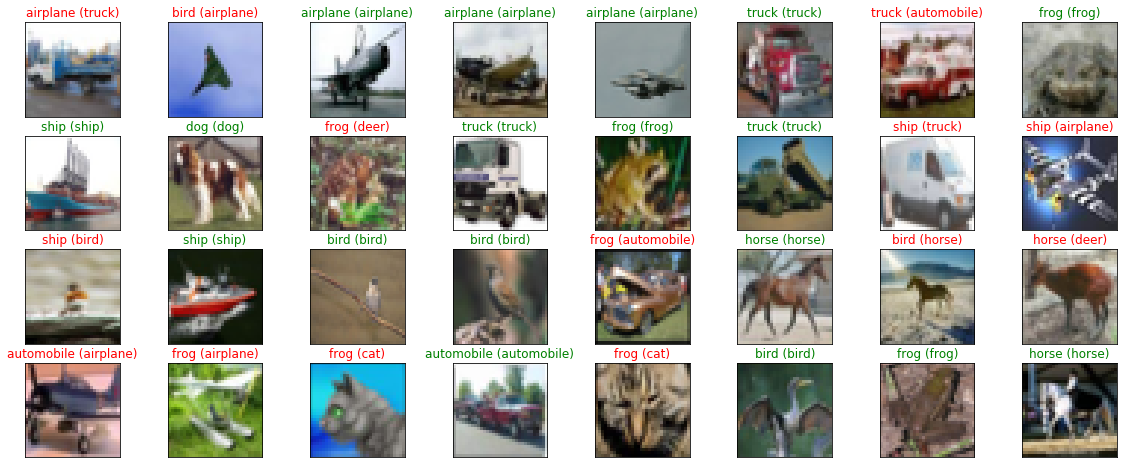

In [25]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat_1[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

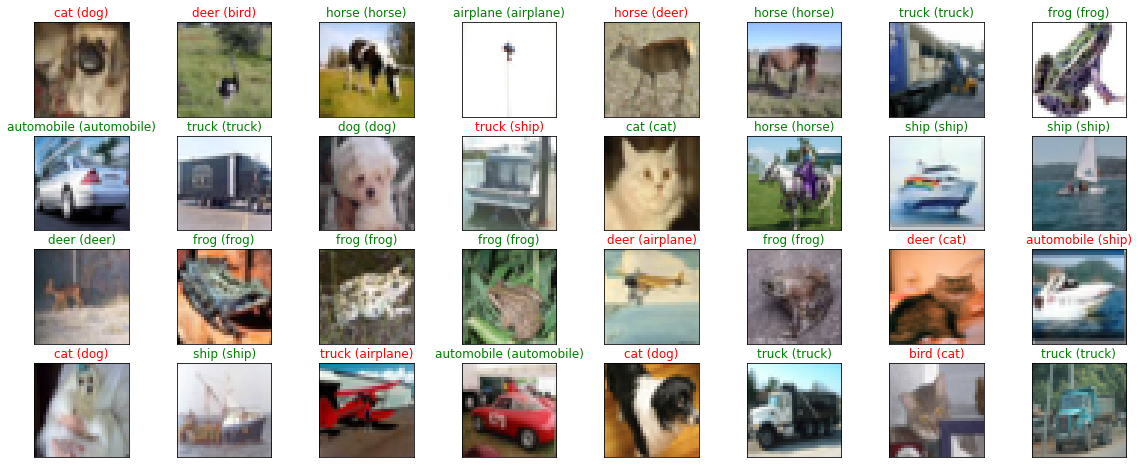

In [26]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat_2[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

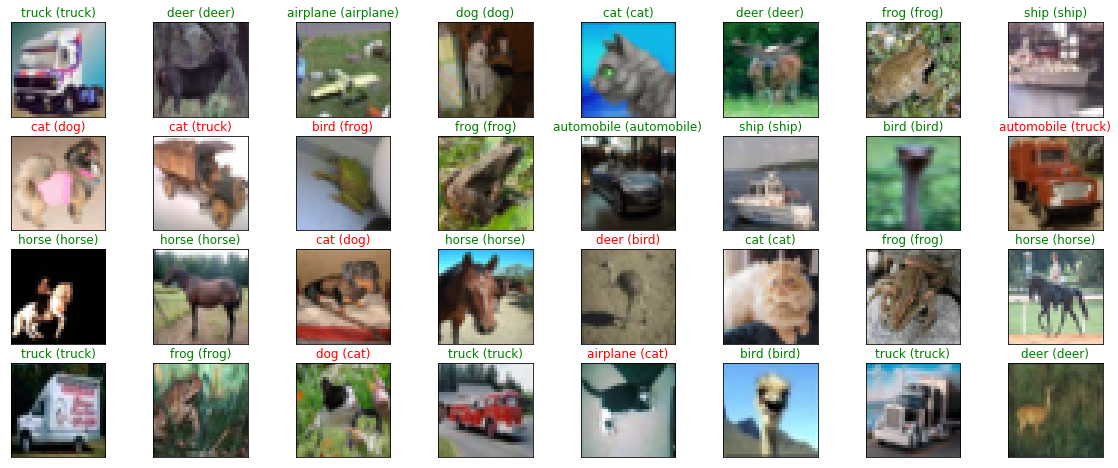

In [27]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat_3[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))